In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(path='mnist.npz'):
    with np.load(path, allow_pickle=True) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

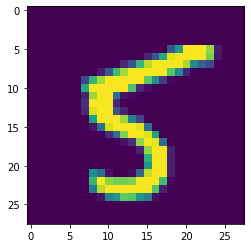

In [4]:
index = 127
plt.imshow(x_test[index])
plt.show()

In [11]:
class MyFirstClassifier(object):
    def __init__(self):
        self.x_train = None
        self.y_train = None

    def fit(self, x_train, y_train):
        self.x_train = (x_train.astype(np.float32) / 255.)[:2000]
        self.y_train = y_train[:2000]

    def predict(self, x_test):
        pred_ans = []

        for pred_x in (x_test.astype(np.float32) / 255.):
            min_dist = np.Inf
            ans = -1

            for x, y in zip(self.x_train, self.y_train):
                dist = np.linalg.norm(x - pred_x)
                if dist < min_dist:
                    min_dist = dist
                    ans = y

            pred_ans.append(ans)

        return pred_ans
    
def accuracy_score(pred, gt):
    return np.mean(pred==gt)

In [12]:
cls = MyFirstClassifier()
cls.fit(x_train, y_train)
pred = cls.predict(x_test)

print('%.4f' % accuracy_score(pred, y_test))

0.9028
